Physics 474 - Spring 2023 <br>

Homework 3 - Practice with FFT and ODE solutions 


<font color='red'>Author: Djamil Lakhdar-Hamina

_________________________________________________________________________________
In this homework we will practice doing Fourier transforms and solving Ordinary Differential Equations (ODE)

skills we will excercise:
- reading in data
- plotting data
- writing user defined functions
- Performing FFT and Inverse FFT with NumPy
- finding solution to ODE with 'odeint' and/or 'solve_ivp'
- analyzing data and making observations

__________________________________________________________________________

Problem 1:

Practice with Fourier Transforms

Background:

In this problem we will examine historical data for the number of sun spots as a monitor of the solar cycle activity. The data are:

Data description:<br>
Monthly mean total sunspot number obtained by taking a simple arithmetic mean of the daily total sunspot number over all days of each calendar month. Monthly means are available only since 1749 because the original observations compiled by Rudolph Wolf were too sparse before that year.  

Filename: SN_m_tot_V2.0.csv<br>
Format: Comma Separated values <br>
The separator is the semicolon ';'

Contents:
Column 1-2: <br>
Column 1: year<br>
Column 2: Month<br>
Column 3: Date in fraction of year.<br>
Column 4: Monthly mean total sunspot number.<br>
Column 5: Monthly mean standard deviation of the input sunspot numbers.<br>
Column 6: Number of observations used to compute the monthly mean total sunspot number.<br>
Column 7: Definitive/provisional marker. '1' indicates that the value is definitive. '0' indicates that the value is still provisional.<br>

NOTE: We only be using columns 3,4 and you can ignore columns 1,2,5,6,7
____________________________________________________________
Part 1a): (2 pts)

- Read in the data from the file
- plot the sunspot number vs year for the entire dataset



In [220]:
# Your code here...

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import odeint


cols=['year','month','fractional_year','monthly_mean_sunspots','monthly_mean_std','number_observations','definitive']
df=pd.read_csv('sn_m_tot.csv',names=cols,delimiter=';')
N_years=df.year.unique()
df=df[['fractional_year','monthly_mean_sunspots']]
amplitude=df.monthly_mean_sunspots
time=df.fractional_year



0.0833326232501522

Part 1b): (3 pts)

- Peform an FFT on the data
- make 2 plots of the absolute magnitude of the Fourier spectral components vs 1/frequency [units=yrs] 1st plot out to 140 years, 2nd plot to 20 years



3287


ValueError: x and y must have same first dimension, but have shapes (3287,) and (1644,)

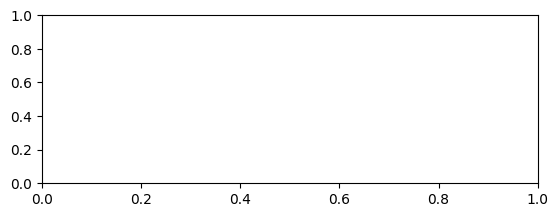

In [225]:
# use np.rfft.fftfreq to get array of 
# frequencies corresponding to fourier components in "freq" array
delta_t=time.diff()
N=len(amplitude)
spectral=np.fft.rfft(amplitude)
f_real=np.fft.fftfreq(N,delta_t)
t_h=1/(f_real )## given in hz (cycle per second) convert to cycle per year

plt.subplot(211)
plt.plot(t_h,spectral)
plt.grid(linestyle='--')
plt.xlabel('Frequency (Years)')
plt.ylabel(r'1/f $G(f)$')
plt.title(r'Spectral Components vrs. Frequency: 1749-1889')

plt.subplot(212)
plt.plot(t_h[0:20*12],spectral[0:20*12])
plt.grid(linestyle='--')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'1/f $G(f)$')
plt.title(r'Spectral Components vrs. Frequency: 1749-1789')

plt.tight_layout()
plt.show()

Observations

________________________________________________________________________________
Problem 2:

Practice with FFTs

In this problem we will examine the use of Fourier Transforms in a hypothetical signal processing problem. you will generate a hypothetical "signal" $S(t)$ that is comprised of a waveform with added additional noise, which makes it difficult to see the signal buried in the random noise when plotted as $S(t)$ versus $t$.

You will do two things
- By using FFT you will observe the $S(t)$ in frequency space $G(f)$ to look for the signal burried in the random noise.
- you will apply a filter in frequency space to remove the "noise" converting $G(f)$ to $G_{filtered}(f)$ and then do an inverse FFT on $G_{filtered}(f)$ to get the filtered signal in time space $S_{filtered}(t)$

Part 2a): (3 pts)

- make a signal $S(t)$  using a sine wave with frequency (f=10 Hz) and amplitude $A=1.0$ with Gaussian (i.e. Normal) random noise added, where the random noise has amplitude mean=0 and $\sigma = 2.0$ 

Make 2 subplots one above the other with
- the waveform $S(t)$ versus $t$
- the spectrum $|G(f)|$ versus $f$


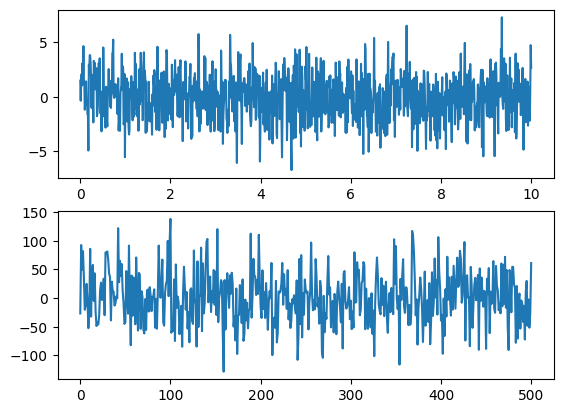

In [228]:
"""
Here  is the signal S(t) generated for you
"""
f_signal = 10 #frequency in Hz
N = 1000   #number of time points
t_max = 10   #max time [s]
t = np.linspace(0,t_max,N) #make time array [s]
A = 1.0   #amplitude of sine wave [arbitray units]
sigma = 2.0  #sigma of random noise on each point [au]

S = A * np.sin(2 * np.pi * f_signal * t) + sigma * np.random.randn(N) #signal S(t)

freq=np.fft.rfftfreq(N,1/N)
spectral=np.fft.rfft(S)

plt.subplot(211)
plt.plot(t,S)
plt.subplot(212)
plt.plot(freq,spectral)


Observations



Part 2b: (2 pts)

filtering the signal

In this part you are asked to filter the signal in the frequency domain to remove noise, then do an inverse Fourier Transform back to the time domain to get a cleaner view of the primary signal.

you should:
- apply a narrow band pass filter, $9.99 Hz \lt f \lt 10.01 Hz$ to get the filtered frequency spectrum $G_{filtered}(f)$. 
- perform an inverse FFT on $G_{filtered}(f)$ to get the new waveform $S_{filtered}(t)$. you can use code something like S_filtered = np.fft.irfft(G_filtered, len(S))
- Plot  $S_{filtered}(t)$ and $|G_{filtered}(f)|$ in two subplots

(array([ 9.7924308e-27,  0.0000000e+00, -4.8962154e-26,  0.0000000e+00,
        9.7924308e-26,  0.0000000e+00, -9.7924308e-26,  0.0000000e+00,
        4.8962154e-26,  0.0000000e+00, -9.7924308e-27]), array([   1.        ,   -9.99976194,   44.99805491, -119.99300925,
        209.98553061, -251.98105938,  209.98382278, -119.99105743,
         44.996957  ,   -9.99943663,    0.99995934]))


Observations


_________________________________________________________________
Problem 3: (5 pts)

Fourier Transforms and the uncertainty relationship

Heisenberg’s uncertainty principle says there is a limit to how well you can know both the position and momentum of anything at the same time.  The product of the uncertainties in the two quantities has a lower bound. You should be familiar these statements in QM

$\Delta x \, \Delta p \geq \frac{\hbar}{2}$    

$\Delta t \, \Delta E \geq \frac{\hbar}{2}$

or using $p=\hbar k$ and $E=\hbar \omega$

$\Delta x \, \Delta k \geq \frac{1}{2}$    

$\Delta t \, \Delta \omega \geq \frac{1}{2}$

There is a closely related principle in Fourier analysis that says a function and its Fourier transform cannot both be localized. The more concentrated a signal is in the time (or space) domain, the more spread out it is in the frequency (or wavenumber) domain.

In this problem we will examine the product of uncertatinties (i.e. spread) using a space (or time) signal and their respective Fourier transforms in wavenumber (or frequency).

There are many ways to quantify how localized or spread out a function is. 

- In the first part for spacial uncertainty we will start with a guassian wavepacket characterized by a spread $\Delta x = \sigma_x$.
- In the second part for time uncertainty we will start with an exponetial decay characterized by a lifetime $\Delta  t =  \tau$.

We will then compute the Fourier transform for each, characterize the spread in the transform as described below, and finally compare the actual spread in the transform to that predicted by the uncertatinty relationship.

_______________________________________________________________
Part 3a: Gaussian wavepacket

Recall from QM that we can describe the location probability density for a particle by giving the magnitude squared $|\psi(x)|^2$ of the wavefunction $\psi(x)$

Here we want a Gaussian wavepacket probability density with central location $x_0$ and localization characterized 
by $\sigma_x$, or

$|\psi(x)|^2 = \frac{1}{\sigma_x \sqrt{2 \pi}} \, e^{-(x-x_0)^2/2 \sigma_x ^2}$

and therefore,

$\psi(x) = \frac{1}{\sqrt{\sigma_x} \, (2\pi)^{1/4}} \, e^{-(x-x_0)^2/4 \sigma_x ^2}$

I want you to:

- use $0 \leq x \leq 50.$ in steps of 0.01
- define a wave function $\psi(x)$ given here for $x_0=10$ and $\sigma_x$ from 0.5 to 2.0 (your choice)
- compute the Fourier transform to get $\phi(1/\lambda)$
- plot  $|\psi(x)|^2$ for $0  \leq x \leq 20$
- plot $|\phi(k)|^2$ normalized to a maximum of 1.0, for BOTH negative and positive $k$, or $-10 \leq k \leq 10$ to be precise. (note: multiply the x-axis "FT frequency" array by $2\pi$ to plot versus $k=\frac{2\pi}{\lambda}$ not $1/\lambda$). NOTE: $|\phi(k)|^2 = |\phi(-k)|^2$
- calculate what $\sigma_k$ should be from the uncertatinty relationship
- plot the predicted theory $|\phi_{thry}(k)|^2$ normalized to a maximum of  1.0 for BOTH negative and positive $k$,  where 

$\,\,\,\,\,\,\,\, |\phi_{thry}(k)|^2 \propto e^{-k^2/(2\sigma_k^2)}$

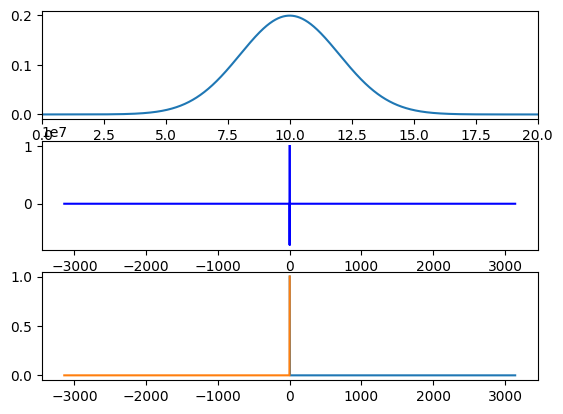

In [227]:
# Your code here...
sqrt=lambda x: (x)**(1/2)
power=lambda x,n: (x)**n
pi=np.pi 

def psi_x(xmin:float,xmax:float,step:int, x0:float=10,sigma:float=.5)->np.array:
    x=np.linspace(xmin,xmax,int((xmax-xmin)/step))
    return x,1/(sqrt(sigma)*power((2*pi),1/4))*np.exp(-power(x-x0,2)/(4*power(sigma,2)))

def phi_k(k:np.array,sigma_k:float)->np.array:
    return np.exp(-power(k,2)/(4*power(sigma_k,2)))

def uncertainty()->float:
    return 0 

x,amplitude=psi_x(0,50,.001,sigma=2)
psi_sqrd=amplitude**2
k = np.fft.rfftfreq(len(psi_sqrd),.001)*2*pi
spectrum=np.fft.rfft(amplitude)
spectrum_sqrd=spectrum **2

fig,axs=plt.subplots(3,1)

axs[0].plot(x,psi_sqrd)
axs[0].set_xlim((0,20))
axs[1].plot(k,spectrum_sqrd,color='blue')
axs[1].plot(-k,spectrum_sqrd,color='blue')
                  
                 
sigma_k=1/(2*sigma)
phi=phi_k(k,sigma_k)
axs[2].plot(k,phi)
axs[2].plot(-k,phi)

Observations



_______________________________________________________________
Part 3b: Finite lifetime (exponential decay)

Here we want to start with a waveform in the time domain $\psi(t)$ such that 
the probability density in time $|\psi(t)|^2$ is characterized by an exponetial decay with lifetime $\tau$. Or,
 
$|\psi(t)|^2 \propto \,e^{-t/\tau}$

and therefore we will take,

$\psi(t) = e^{-t/2\tau}$

I want you to:

- use $0 \leq t \leq 100$ in 2048 points
- define a wave function $\psi(t)$ for $\tau=0.5$ 
- compute the Fourier transform to get $\phi(f)$
- plot  $|\psi(t)|^2$ for $0 \leq t \leq 5\,\tau$
- plot $|\phi(\omega)|^2$ normalized to a maximum = 1.0, for BOTH negative and positive $\omega$ or $-10 \leq \omega \leq 10$ to be precise. (note: multiply the x-axis "FT frequency" array by $2\pi$ to plot versus $\omega  =2\pi f$ not $f$). NOTE: $|\phi(\omega)|^2 = |\phi(-\omega)|^2$
- calculate what $\sigma_\omega$ should be from the uncertatinty relationship using $\sigma_t=\tau$
- plot the predicted theory $|\phi_{thry}(\omega)|^2$ normalized to a maximum = 1.0 for BOTH negative and positive $\omega$  where 

$\,\,\,\,\,\,\,\, |\phi_{thry}(\omega)|^2 \propto \frac{\Gamma}{\omega^2+(\Gamma/2)^2}$, 
and

$\,\,\,\,\,\,\,\, \Gamma = 2\,\sigma_{\omega}=1/\tau$

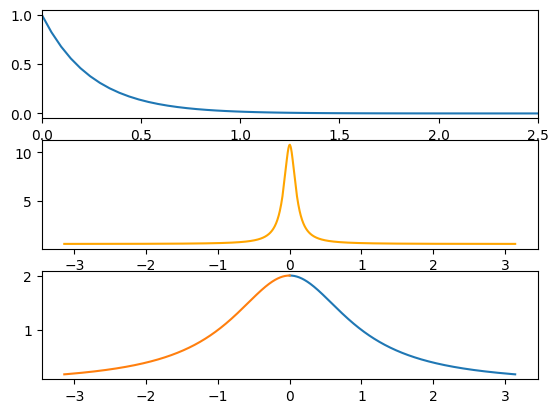

In [216]:
# your code here...


def psi_t(tmin:float,tmax:float,n:int,tau:float=.5)->np.array:
    t=np.linspace(tmin,tmax,n)
    return t,np.exp(-t/tau)

def phi_theory(gamma=1/tau,omega=omega*2*pi)->np.array:
    return gamma/(omega**2+(gamma/2)**2)

def uncertainty()->float:
    return 0 

tau=.5
t,psi=psi_t(0,100,2048,.5)
omega = np.fft.rfftfreq(len(psi))
phi=np.fft.rfft(psi)
fig,axs=plt.subplots(3,1)
axs[0].plot(t,psi**2)
axs[0].set_xlim(0,5*tau)
axs[1].plot(omega*2*pi,phi,color='orange')
axs[1].plot(-omega*2*pi,phi,color='orange')

sigma_omega=1/(2*tau)

axs[2].plot(omega*2*pi,phi_theory())
axs[2].plot(-omega*2*pi,phi_theory())

Observations:



_______________________________________________________________________
Problem 4 (5 pts)

ODE

Damped Harmonic Oscillator


 You will apply the "scipy.integrate.odeint" or "solve_ivp" function to solve a 2nd order Ordinary Differential Equation (ODE) for the motion of a Damped Harmonic Oscillator.

Mass [m] on a Spring with spring constant [k] and displacement from equilibrium [x]<br>

] <br>
] $\;\;\;\;\;\;$  k      <br>
]---/\\/\\/\\/\\/\\/---|M| <br>
]      $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$   --->x <br>
] <br>

The equation for a simple harmonic oscillator (SHO), such as a mass on a spring above is: 

$\; \; \; \; \; m\frac{d^2x}{dt^2}+c\frac{dx}{dt}+k x =0$ 

or 

$\; \; \; \; \; \frac{d^2x}{dt^2}+2\zeta \omega_0\frac{dx}{dt}+\omega_0^2 x =0$ 

where $\omega_0$ is the characteristic angular frequency and the "damping ratio" $\zeta$ are given by

 $\; \; \; \; \; \omega_0^2 = k/m$
 
 $\; \; \; \; \; \zeta = \frac{c}{2\sqrt{k/m}}$



This 2nd order ODE can be written as two coupled 1st order ODEs using:

$\;\;\;\; y_0 = x \;\;\;\;\;y_1 = \dot{x}=dy_0/dt$

Then

$dy_0/dt = dx/dt = y_1 \;\;\;\;\;$

$dy_1/dt=d^2y_0/dt^2 = d^2x/dt^2 = - 2\zeta \omega_0 y_1 -\omega_0^2 y_0 $

or to simplify a little:

$\;\;\;\; dy_0/dt = y_1$ <br>
$\;\;\;\; dy_1/dt = - 2\zeta \omega_0 y_1 -\omega_0^2 y_0 $ 

Putting this in array form for use with odeint in python:

$\;\;\;\; \mathbf{y} = \left[ \begin{array}{c} y_0 \\ y_1 \end{array} \right]
\;\;\;\;\;\;\;\; \frac{d\mathbf{y}}{dt} = \left[ \begin{array}{c} y_1 \\ - 2\zeta \omega_0 y_1-\omega_0^2 y_0  \end{array} \right]$

where the second equation for the 1st derivative is what you write as your user function "def F(y,t):" that odeint calls. (see examples from class on ELMS)


Use the following: <br>
Spring Constant: k = 50.0 N/m <br>
Mass: m = 10.0 kg <br>
Initial Displacement: $x(0) = 0 \; m$ <br>
Initial Velocity: $dx/dt (0) = 0.1 \; m/s$<br>
Time: $0-50s$ in $0.001s$ steps


Make a figure that shows displacement vs time in 4 rows (i.e. subplots) with the following $\zeta$

- $\zeta = 0.05$ low damping
- $\zeta = 0.7$ just under critical damping
- $\zeta = 1$ critical damping
- $\zeta = 5$ over damped

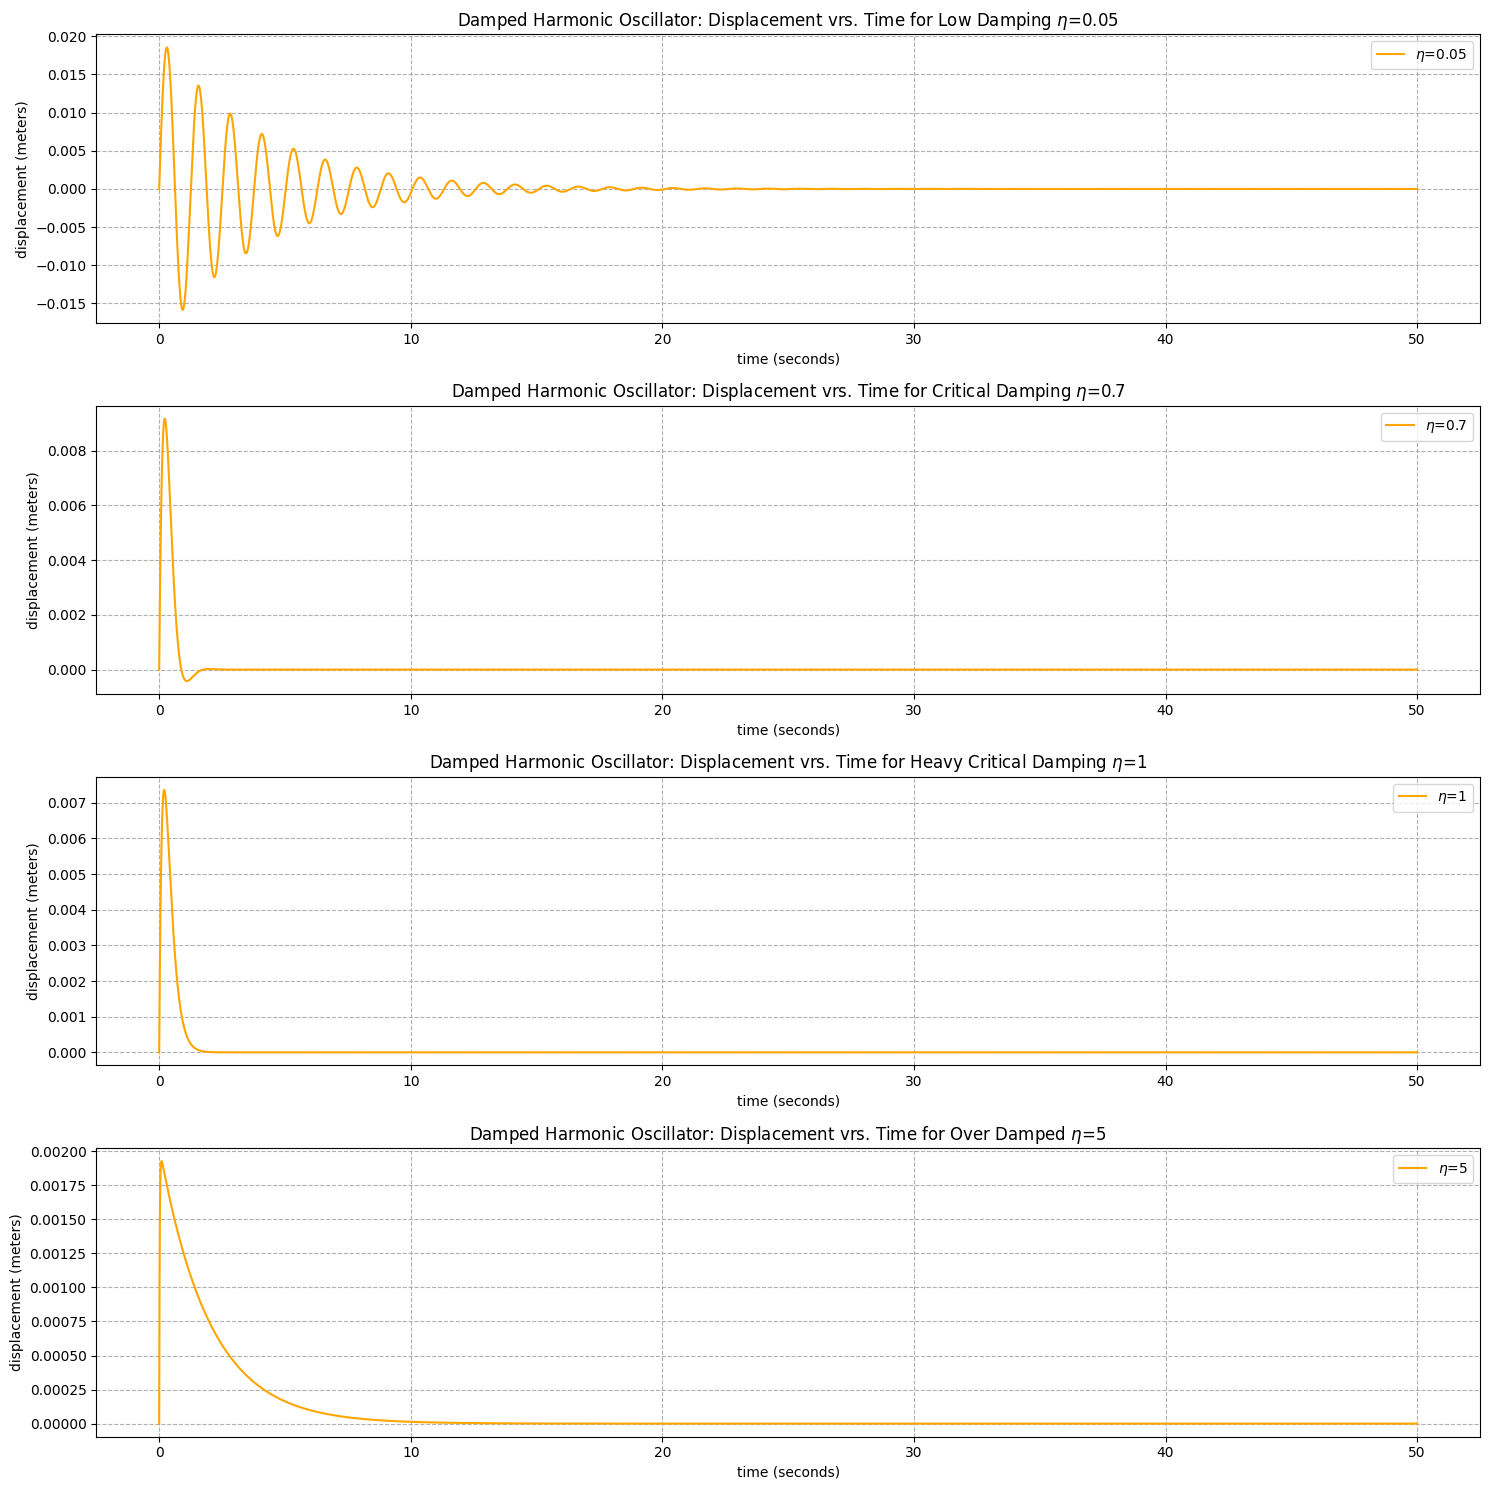

In [72]:

"""
Time range and interval for integration of equations
"""

etas=[.05,.7,1,5]
names_etas=['Low Damping','Critical Damping', 'Heavy Critical Damping','Over Damped']
k=50
mass=10.0
delta_t=.001
t_min =0.0; t_max=50
t=np.linspace(t_min,t_max,int(t_max/delta_t))


x_i = 0.0    #initial displacement [meters]
v_i = .1   #Also max amplitude [m/s]
Q0=[x_i,v_i]

def damped_oscillator(y,t,m,eta,k): 
    """ 
    This funcDon defines the derivaDves for damped oscilattor  
    y[0] = Theta 
    y[1] = dTheta/dt 
    """ 
    omega=k/m
    dy = [0,0]   #set up array for derivaDves of coupled equaDons 
    #dy[0]/dt = y[1] = d(Theta)/dt 
    dy[0]=y[1]       
    #dy[1]/dt = d^2y[0]/dt^2y[1] = d^2(Theta)/dt^2 = -g/l sin(Theta) 
    dy[1]= -2*eta*omega*y[1]-omega**2*y[0]
    return dy 

i=0
fig,ax=plt.subplots(4,1)
fig.set_figheight(15)
fig.set_figwidth(15)
for (eta,name) in zip(etas,names_etas):
    x=[row[0] for row in odeint(damped_oscillator,Q0,t,args=(mass,eta,k))]
    ax[i].plot(t,x,label='$\eta$='+f'{eta}',color='orange')
    ax[i].set_xlabel('time (seconds)')
    ax[i].set_ylabel('displacement (meters)')
    ax[i].set_title(f'Damped Harmonic Oscillator: Displacement vrs. Time for {name}' + r' $\eta$='+f'{eta}')
    ax[i].grid(linestyle='--')

    ax[i].legend()
    i+=1
    
fig.tight_layout()
  

Observations
